# Week 05 Example: Regression and Classification

This week's example set will walk you through the followings:

- Calculate covariance using pandas
- Compute Pearon's correlation using pandas
- Compute sample correlation using numpy corrcoef
- Compute Chi square using scipy
- Perform linear regression using scikit-learn
- Perform logistic regression using scikit-learn
- Compute K-means using scikit-learn

The two new packages you will encounter this week are:

`scipy.stats`: https://docs.scipy.org/doc/scipy/reference/stats.html

`scikit-learn`: https://scikit-learn.org/stable/

In [5]:
%matplotlib notebook
import pandas as pd
import numpy as np

#import pyplot from matplotlib for data visualisation
from matplotlib import pyplot as plt
#import Axes3D for some of the 3D visualisation
from mpl_toolkits.mplot3d import Axes3D

In [6]:
adult_data = pd.read_csv('./data/adult/adult_full.data')
iris_data = pd.read_csv('./data/iris/iris.data')

## Example 1: Covariance of Two Variables

This example uses the following methods and packages:

`Dataframe.cov`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cov.html

`Dataframe.corr`: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html#pandas.DataFrame.corr

`numpy.corrcoef`: https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html

In [7]:
iris_data.iloc[:,0:4].cov()

,sepal_length,sepal_width,pedal_length,pedal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
pedal_length,1.273682,-0.321713,3.113179,1.296387
pedal_width,0.516904,-0.117981,1.296387,0.582414


In [8]:
iris_data.iloc[:,0:4].corr(method='pearson')

,sepal_length,sepal_width,pedal_length,pedal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
pedal_length,0.871754,-0.420516,1.000000,0.962757
pedal_width,0.817954,-0.356544,0.962757,1.000000


In [9]:
#sample correlation
iris_data.type = iris_data.type.astype('category')
iris_samples = iris_data.sample(4).to_numpy()

rho = np.corrcoef(iris_samples[:,0:4].astype(np.float32))

#Covert the result to a pandas dataframe for ease of printing
result = pd.DataFrame(data = rho, index=iris_samples[:,4],columns=iris_samples[:,4])
print(result)

                Iris-virginica  Iris-setosa  Iris-setosa  Iris-virginica
Iris-virginica        1.000000     0.668938     0.637136        0.970229
Iris-setosa           0.668938     1.000000     0.998392        0.536787
Iris-setosa           0.637136     0.998392     1.000000        0.509280
Iris-virginica        0.970229     0.536787     0.509280        1.000000


## Example 2: Linear Regression

This example uses the following methods and classes from sklearn and numpy

`sklearn.linear_model.LinearRegression`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

`numpy.sum`: https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html

`numpy.mean`: https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html

`numpy.sqrt`: https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html

In [10]:
from sklearn import linear_model

linreg = linear_model.LinearRegression()
linreg.fit(iris_data.pedal_length.to_numpy().reshape(-1,1), iris_data.pedal_width)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print('The coefficient is ', linreg.coef_)

predicted_width = linreg.predict(iris_data.pedal_length.to_numpy().reshape(-1,1))

The coefficient is  [0.41641913]


In [12]:
#calculate the sum square error (SSE)
sse = np.sum(np.square(predicted_width - iris_data.pedal_width))

#calculate the mean square error (MSE)
mse = np.mean(np.square(predicted_width - iris_data.pedal_width))

#calculate the root mean square error (RMS)
rms = np.sqrt(mse)

print('SSE=', sse, 'MSE=', mse, 'RMS=', rms)

SSE= 6.343491947922636 MSE= 0.04228994631948424 RMS= 0.20564519522586527


In [13]:
#the score method can be used to evaluate the accuracy of the linear regression model
linreg.score(iris_data.pedal_length.to_numpy().reshape(-1,1), iris_data.pedal_width)

0.9269012279220037

<IPython.core.display.Javascript object>


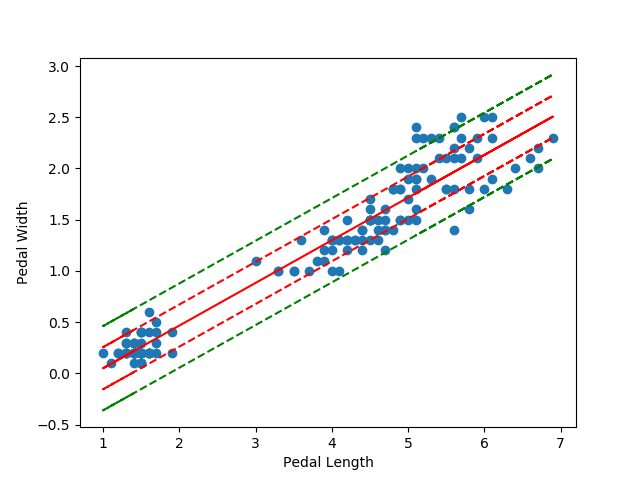

Text(0, 0.5, 'Pedal Width')

In [14]:
#Visualise the linear regression model
fig = plt.figure()

axis = fig.add_subplot(111)

axis.scatter(iris_data.pedal_length, iris_data.pedal_width)
axis.plot(iris_data.pedal_length, predicted_width, color='r')

#Visualise the bounds of one RMS
axis.plot(iris_data.pedal_length, predicted_width+rms, '--', color='r')
axis.plot(iris_data.pedal_length, predicted_width-rms, '--', color='r')

#Visualise the bounds of two RMS
axis.plot(iris_data.pedal_length, predicted_width+rms*2.0, '--', color='g')
axis.plot(iris_data.pedal_length, predicted_width-rms*2.0, '--', color='g')

axis.set_xlabel('Pedal Length')
axis.set_ylabel('Pedal Width')


In [13]:
#Multiple regression: (sepal length, sepal width, pedal length) -> pedal width
linreg.fit(iris_data.loc[:,['sepal_length','sepal_width','pedal_length']], iris_data.pedal_width)

linreg.coef_

array([-0.21027133,  0.22877721,  0.52608818])

In [17]:
#Predict pedal width from 'sepal length', 'sepal width' and 'pedal length'
predicted_width = linreg.predict(iris_data.loc[:,['sepal_length','sepal_width','pedal_length']])

ValueError: shapes (150,3) and (1,) not aligned: 3 (dim 1) != 1 (dim 0)

## Example 3: Chi-Square $\chi^2$

This example uses the chisquare method from scipy.stats.

`scipy.stats.chisquare`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [18]:
from scipy.stats import chisquare

fd = pd.crosstab(adult_data.loc[:,'sex'],adult_data.loc[:,'salary'])

#The expected values are calculated based on the formula in the lecture slide
expected = np.array([[12249.57,3869.29],[24870.35,7853.79]])

#N.B. we used flatten here so that the chisquare method treats the entire cross table as one data series
# By default, chisquare treats each column as a series
stats, p = chisquare(fd.to_numpy().flatten(), f_exp=expected.flatten(), ddof=1)

print('Chi square is', stats, 'p-value is', p)

Chi square is 2252.079477470469 p-value is 0.0


## Example 4: Logistic Regression

This example uses the LogisticRegression class from sklearn.linear_model

`sklearn.linear_model.LogisticRegression`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [19]:
#import LogisticRegression class from scikit-learn
from sklearn.linear_model import LogisticRegression

In [20]:
#Here we will use logistic regression to classify salary based on age alone

#Set the salary column as category type, doing so will allow us to more easily convert category label to an integer
adult_data['salaryid']=adult_data.salary.astype('category')

#Get the number of sample
nsamples = len(adult_data.index)

#Convert the age column to a numpy array
age = adult_data.age.to_numpy()

#Reshape the age column to a nsamples-by-1 array, 
#N.B. most regression routine expect inputs to be arranged in columns, i.e. each variable is a column 
age = np.reshape(age, (nsamples,1))

#the .cat.codes property gives the numerical value of a category label
salary = adult_data.salaryid.cat.codes

#Create an instance of Logistic Regression,
#the solver lbfgs is a form of quasi-Newton method
#As we a dealing with a binary classification problem, the multi_class property is set to ovr
classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')

#Train the classifier
classifier.fit(age, salary)

#get the accuracy score
classifier.score(age,salary)

0.7491298472626019

In [21]:
#Use the classifier to predict salary from input age
input_ages = np.array([[65,45,18,25,35]])

classifier.predict(input_ages.T)

array([0, 0, 0, 0, 0], dtype=int8)

In [22]:
#We can also use predict_proba to see the likelihood of being either of the class
#the result is a MxN array, with M corresponds to the number of query input and N is the number label
#e.g. in the print out below, for age 65 is likelihood of <=50K is 0.55, >50K is 0.45
classifier.predict_proba(input_ages.T)

array([[0.55098935, 0.44901065],
       [0.7270065 , 0.2729935 ],
       [0.88344775, 0.11655225],
       [0.85249509, 0.14750491],
       [0.7968783 , 0.2031217 ]])

<IPython.core.display.Javascript object>


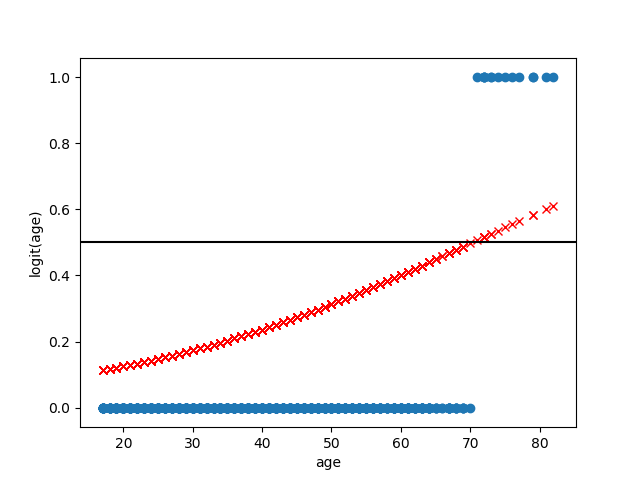

Text(0, 0.5, 'logit(age)')

In [23]:
#Visualise logistic regression

fig = plt.figure()

axis = fig.add_subplot(111)

input_ages = adult_data.sample(1000).age.to_numpy()

salary = classifier.predict(input_ages.reshape(-1,1))
salary_proba = classifier.predict_proba(input_ages.reshape(-1,1))

axis.scatter(input_ages, salary, label=adult_data.salaryid.cat.codes)
axis.plot(input_ages, salary_proba[:,1],'x', color='r')

axis.axhline(0.5, color='black')

axis.set_xlabel('age')
axis.set_ylabel('logit(age)')


In [21]:
#Similar to the age -> salary classification, here we attempt to use hours-per-week to predict salary

hrsPerWk = adult_data['hours-per-week'].to_numpy()
hrsPerWk = np.reshape(hrsPerWk, (nsamples,1))
salary = adult_data.salaryid.cat.codes

classifier = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr')
classifier.fit(hrsPerWk, salary)
classifier.score(hrsPerWk,salary)

0.7531427869456615

<IPython.core.display.Javascript object>


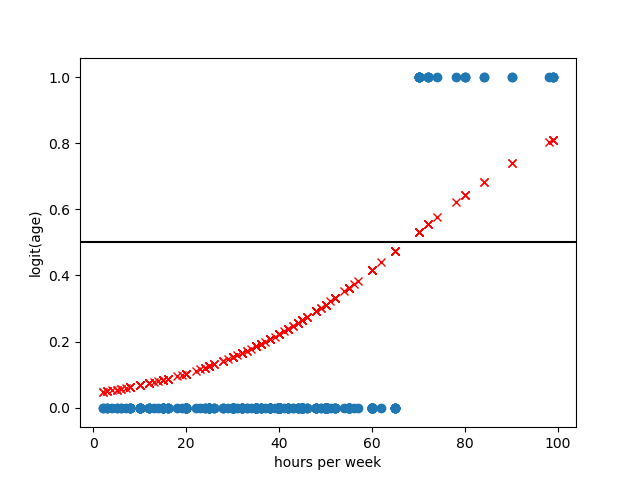

Text(0, 0.5, 'logit(age)')

In [22]:
#Visualise logistic regression

fig = plt.figure()

axis = fig.add_subplot(111)

input_ages = adult_data.sample(1000).loc[:,'hours-per-week'].to_numpy()

salary = classifier.predict(input_ages.reshape(-1,1))
salary_proba = classifier.predict_proba(input_ages.reshape(-1,1))

axis.scatter(input_ages, salary, label=adult_data.salaryid.cat.codes)
axis.plot(input_ages, salary_proba[:,1],'x', color='r')

axis.axhline(0.5, color='black')

axis.set_xlabel('hours per week')
axis.set_ylabel('logit(age)')

In [24]:
#In this example, we will use both age and hours-per-week as input features to predict salary
features = adult_data.loc[:,['age','hours-per-week']].to_numpy()
salary = adult_data.salaryid.cat.codes

classifier = LogisticRegression(random_state=0, solver='lbfgs',multi_class='ovr')
classifier.fit(features, salary)
classifier.score(features,salary)

0.7547397731460628

In [25]:
#This example is based on the iris data
iris_data['typeid'] = iris_data.type.astype('category')

#The input features are sepal_length, sepal_width, pedal_length and pedal_width
#target class are setosa, virginica and versicolor
irisFeatures = iris_data.iloc[:,0:4].to_numpy()
irisLabels = iris_data.typeid.cat.codes

#As this classification problem involves more than two classes, the multi_class property is set to multinomial
irisClassifier = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
irisClassifier.fit(irisFeatures, irisLabels)

#The method score shows the mean accuracy of this classifier
irisClassifier.score(irisFeatures, irisLabels)

0.9733333333333334

## Example 5: Clustering using K mean

This example uses the KMeans class from sklearn.cluster.

`sklearn.cluster.KMeans`: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [26]:
#import the k means method from scikit learn
from sklearn.cluster import KMeans

In [27]:
irisFeatures = iris_data.iloc[:,[0,1,3]].to_numpy()

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(irisFeatures)

kmeans.predict(iris_data.iloc[:4,[0,1,3]])

array([0, 0, 0, 0])

<IPython.core.display.Javascript object>


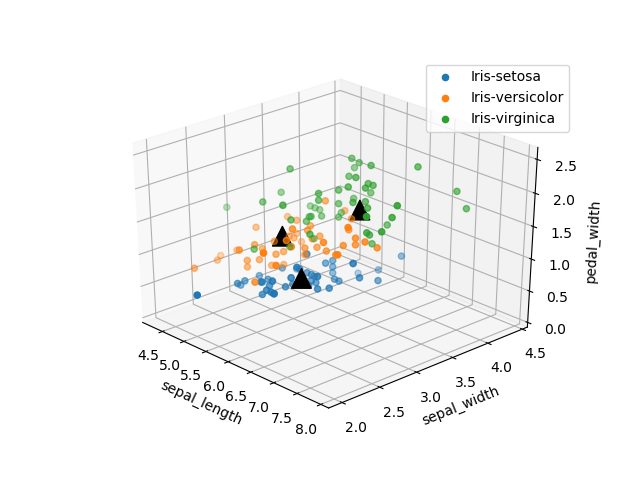

In [28]:
#visualise the centre of each cluster
centres = kmeans.cluster_centers_

fig = plt.figure()
axis = fig.add_subplot(111, projection='3d')

groups = iris_data.groupby(by='type')

axis.set_xlabel('sepal_length')
axis.set_ylabel('sepal_width')
axis.set_zlabel('pedal_width')

for name, group in groups:
    axis.scatter(group.sepal_length, group.sepal_width, group.pedal_width, label=name)

axis.scatter(centres[:,0], centres[:,1], centres[:,2], marker='^', color='k', s=200, alpha=1)
    
axis.legend()
plt.show()

<IPython.core.display.Javascript object>


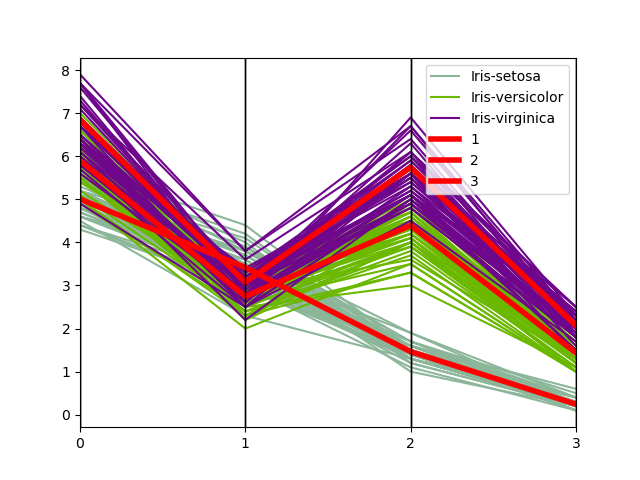

In [45]:
#Here we use all four features to cluster the iris data using K-Means

irisFeatures = iris_data.iloc[:,0:4].to_numpy()

kmeans = KMeans(n_clusters=3, random_state=0)

kmeans.fit(irisFeatures)
kmeans.labels_

kmeans.predict(iris_data.iloc[:4,0:4])

fig = plt.figure()
axis = fig.add_subplot(111)

pd.plotting.parallel_coordinates(iris_data, class_column='type', ax=axis)

centres = pd.DataFrame(kmeans.cluster_centers_)
centres['type']=[1,2,3]


pd.plotting.parallel_coordinates(centres, class_column='type', ax=axis, color='r', lw=4)
